In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from scipy.interpolate import interp2d
import scipy.special as special
from scipy.integrate import quad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [2]:
#load datafiles
chi_11_real_data = np.loadtxt('chi_11_real_step_5.txt')
chi_11_imag_data = np.loadtxt('chi_11_imag_step_5.txt')

chi_12_real_data = np.loadtxt('chi_12_real_step_5.txt')
chi_12_imag_data = np.loadtxt('chi_12_imag_step_5.txt')

chi_13_real_data = np.loadtxt('chi_13_real_step_5.txt')
chi_13_imag_data = np.loadtxt('chi_13_imag_step_5.txt')

chi_22_real_data = np.loadtxt('chi_22_real_step_5.txt')
chi_22_imag_data = np.loadtxt('chi_22_imag_step_5.txt')

chi_32_real_data = np.loadtxt('chi_32_real_step_5.txt')
chi_32_imag_data = np.loadtxt('chi_32_imag_step_5.txt')

chi_33_real_data = np.loadtxt('chi_33_real_step_5.txt')
#chi_33_imag_data = np.loadtxt('chi_33_imag_step_5.txt') #not done yet

In [3]:
#generate spline fits

start = 1.
end   = 1000.
step  = 5.

gam   = np.arange(start, end, step)
omrat = np.arange(start, end, step)

chi_11_real_spline = interp2d(gam, omrat, chi_11_real_data)
chi_11_imag_spline = interp2d(gam, omrat, chi_11_imag_data)

chi_12_real_spline = interp2d(gam, omrat, chi_12_real_data)
chi_12_imag_spline = interp2d(gam, omrat, chi_12_imag_data)

chi_13_real_spline = interp2d(gam, omrat, chi_13_real_data)
chi_13_imag_spline = interp2d(gam, omrat, chi_13_imag_data)

chi_22_real_spline = interp2d(gam, omrat, chi_22_real_data)
chi_22_imag_spline = interp2d(gam, omrat, chi_22_imag_data)

chi_32_real_spline = interp2d(gam, omrat, chi_32_real_data)
chi_32_imag_spline = interp2d(gam, omrat, chi_32_imag_data)

chi_33_real_spline = interp2d(gam, omrat, chi_33_real_data)
#chi_33_imag_spline = interp2d(gam, omrat, chi_33_imag_data) #not done yet

#pl.plot(gam, chi_12_spline(gam, 1000.))
#pl.plot(gam, chi_32_spline(gam, 1000.))

In [4]:
epsilon0  = 1./(4. * np.pi)
e         = 4.80320680e-10
m         = 9.1093826e-28
c         = 2.99792458e10
epsilon   = -1.

n_e     = 1.
B       = 1.         
e       = 1.          
theta   = np.pi/3.   
omega_p = np.sqrt(n_e * e*e / (m * epsilon0))    
omega_c = e * B / (m * c)

omega   = 10 * omega_c
theta_e = 10.

In [5]:
#integrands
def chi_11_real_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_11_real_spline(gamma, omratio)[0]
    return ans

def chi_12_real_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_12_real_spline(gamma, omratio)[0]
    return ans

def chi_13_real_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_13_real_spline(gamma, omratio)[0]
    return ans

def chi_22_real_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_22_real_spline(gamma, omratio)[0]
    return ans

def chi_32_real_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_32_real_spline(gamma, omratio)[0]
    return ans

def chi_33_real_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_33_real_spline(gamma, omratio)[0]
    return ans

def chi_11_imag_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_11_imag_spline(gamma, omratio)[0]
    return ans

def chi_12_imag_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_12_imag_spline(gamma, omratio)[0]
    return ans

def chi_13_imag_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_13_imag_spline(gamma, omratio)[0]
    return ans

def chi_22_imag_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_22_imag_spline(gamma, omratio)[0]
    return ans

def chi_32_imag_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_32_imag_spline(gamma, omratio)[0]
    return ans

def chi_33_imag_integrand(gamma, theta_e, omratio):
    beta = np.sqrt(1. - 1./gamma**2.)
    dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    gam_term = dist * gamma**3. * beta**3.
    ans = gam_term * chi_33_imag_spline(gamma, omratio)[0]
    return ans

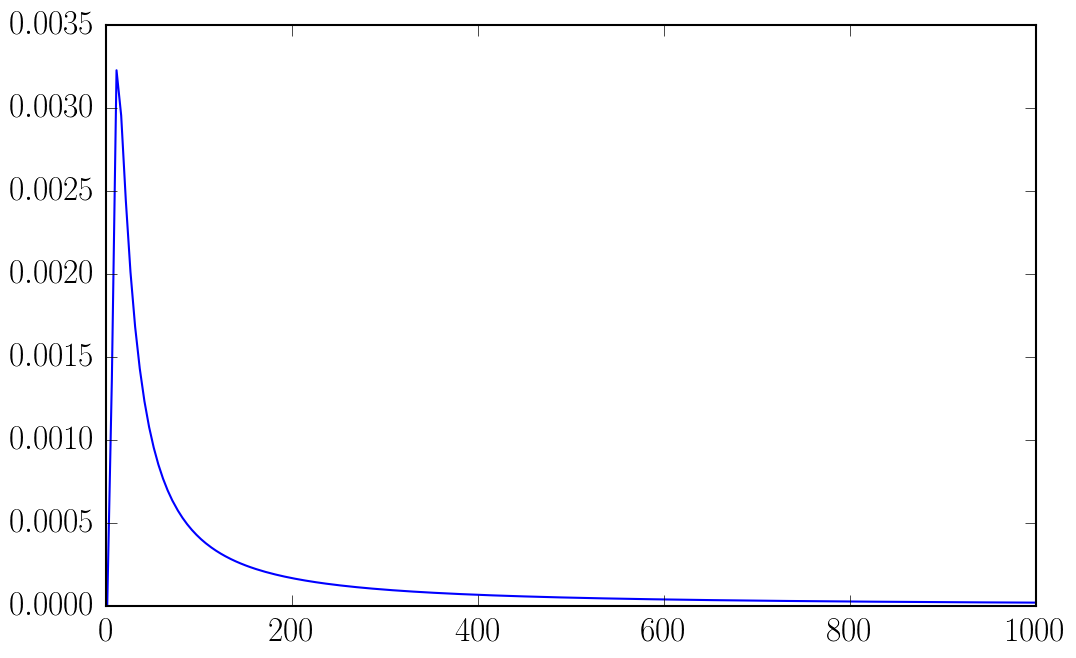

In [37]:
omr = np.linspace(1., 1000., 1000)

pl.plot(omr, np.vectorize(chi_12_real_spline)(omr, 100.))



#pl.loglog(omr, np.vectorize(chi_12_real_spline)(10., omr))
#pl.loglog(omr, np.vectorize(chi_12_real_spline)(50., omr))
#pl.loglog(omr, np.vectorize(chi_12_real_spline)(100., omr))
#pl.loglog(omr, np.vectorize(chi_12_real_spline)(150., omr))
#pl.loglog(omr, np.vectorize(chi_12_real_spline)(200., omr))

In [6]:
#susceptibility tensor components
def chi_11_real(theta_e, omega):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega);
    ans = quad(lambda gamma: np.vectorize(chi_11_real_integrand)(gamma, theta_e, omega / omega_c), 
               1., 150.)[0] * prefactor
    return ans

def chi_12_real(theta_e, omega):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega);
    ans = quad(lambda gamma: np.vectorize(chi_12_real_integrand)(gamma, theta_e, omega / omega_c), 
               1., 150.)[0] * prefactor
    return ans

def chi_13_real(theta_e, omega):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega);
    ans = quad(lambda gamma: np.vectorize(chi_13_real_integrand)(gamma, theta_e, omega / omega_c), 
               1., 150.)[0] * prefactor
    return ans

def chi_22_real(theta_e, omega):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega);
    ans = quad(lambda gamma: np.vectorize(chi_22_real_integrand)(gamma, theta_e, omega / omega_c), 
               1., 150.)[0] * prefactor
    return ans

def chi_32_real(theta_e, omega):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega);
    ans = quad(lambda gamma: np.vectorize(chi_32_real_integrand)(gamma, theta_e, omega / omega_c), 
               1., 150.)[0] * prefactor
    return ans

def chi_33_real(theta_e, omega):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega);
    ans = quad(lambda gamma: np.vectorize(chi_33_real_integrand)(gamma, theta_e, omega / omega_c), 
               1., 150.)[0] * prefactor
    return ans

In [7]:
print chi_33_real(10., omega_c)

-6.8964752894e-07


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
